In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls1 = pd.ExcelFile('Users_2019.xlsx')
xls2 = pd.ExcelFile('Bounce_rate_2019.xlsx')
Users = pd.read_excel(xls1, 'Dataset1')
Conversion_Rate = pd.read_excel(xls2, 'Dataset1')

In [3]:
#Remove the dates for ease
Users = Users['Users']
Bounce_Rate = Conversion_Rate['Bounce Rate']

In [4]:
#convert datasets into arrays
Users = Users.values
Bounce_Rate = Bounce_Rate.values

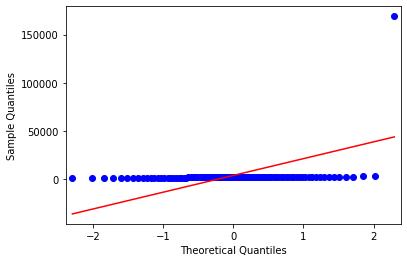

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Users, line='s')
pyplot.show()

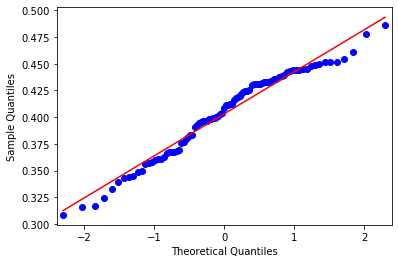

In [6]:
qqplot(Bounce_Rate, line='s')
pyplot.show()

### Both datasets look not normal since they fall off the qq plot

In [7]:
# normality test with Shapiro
stat, p = shapiro(Users)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.094, p=0.000
Sample does not look Gaussian (reject H0)


In [8]:
stat, p = shapiro(Bounce_Rate)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.023
Sample does not look Gaussian (reject H0)


### Since both datasets are not normaly distributed non-parametric tests should be used.

In [9]:
#import Spearman rank correlation:
#A non-parametric test that is used to measure the degree of association between two variables.
from scipy.stats import stats

In [10]:
stat, p = stats.spearmanr(Users,Bounce_Rate)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
	print('The correlation observed is not significant (fail to reject H0)')
else:
	print('The correlation observed is significant (reject H0)')

if stat > 0:
	print('The two datasets are positively corelated (as Users Increase, Bounce Rate Increases)')
elif stat < 0:
	print('The two datasets are negatively corelated (as Users Increase, Bounce Rate Decreases)')
else:
    print('The two datasets are not corelated')

Statistics=0.070, p=0.509
The correlation observed is not significant (fail to reject H0)
The two datasets are positively corelated (as Users Increase, Bounce Rate Increases)


## We conclude that the two datasets are positively corelated and the correlation observed is not significant